In [93]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [94]:
#import data into dataframe
df=pd.read_csv("Comcast_telecom_complaints_data.csv")
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


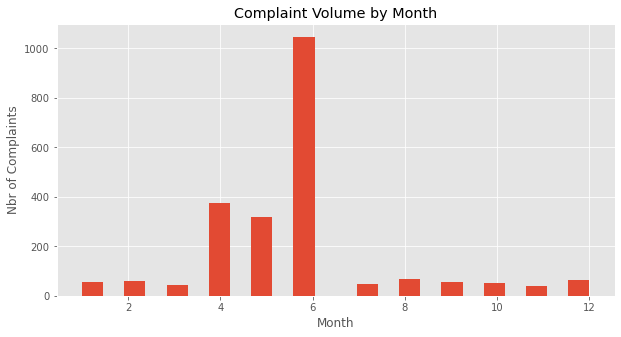

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [95]:
#convert date to datetime
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

#add month column to dataframe
df["Month"] = df["Date_month_year"].dt.month

#plot volume by month
plt.figure(figsize=(10,5))
df["Month"].hist(bins=24)
plt.title("Complaint Volume by Month")
plt.xlabel("Month")
plt.ylabel("Nbr of Complaints")
plt.show()

df.head()

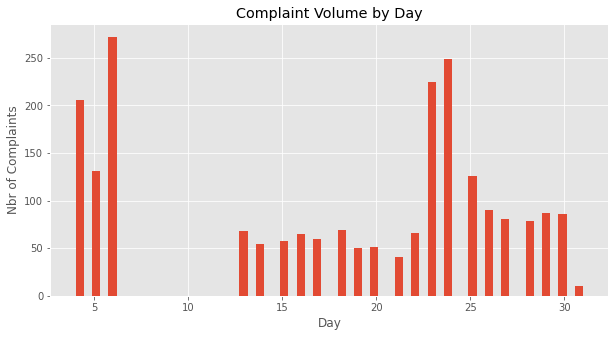

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26


In [96]:
#add day column to dataframe
df["Day"] = df["Date_month_year"].dt.day

#plot volume by day
plt.figure(figsize=(10,5))
df["Day"].hist(bins=62)
plt.title("Complaint Volume by Day")
plt.xlabel("Day")
plt.ylabel("Nbr of Complaints")
plt.show()

df.head()

In [97]:
#add complaint type category field and clean up data
df["Complaint Type"] = df["Customer Complaint"].str.extract("(Speed|speed|network|Network|Internet|internet|Service|service|bill|Bill|price|Price)")
df["Complaint Type"] = df["Complaint Type"].fillna("Other")
df["Complaint Type"] = df["Complaint Type"].replace("speed","Internet")
df["Complaint Type"] = df["Complaint Type"].replace("Speed","Internet")
df["Complaint Type"] = df["Complaint Type"].replace("internet","Internet")
df["Complaint Type"] = df["Complaint Type"].replace("network","Network")
df["Complaint Type"] = df["Complaint Type"].replace("service","Service")
df["Complaint Type"] = df["Complaint Type"].replace("bill","Bill")
df["Complaint Type"] = df["Complaint Type"].replace("price","Bill")
df["Complaint Type"] = df["Complaint Type"].replace("Price","Bill")

#show frequency of complaint types
df["Complaint Type"].value_counts()

Other       999
Internet    576
Bill        340
Service     307
Network       2
Name: Complaint Type, dtype: int64

<AxesSubplot:ylabel='Month'>

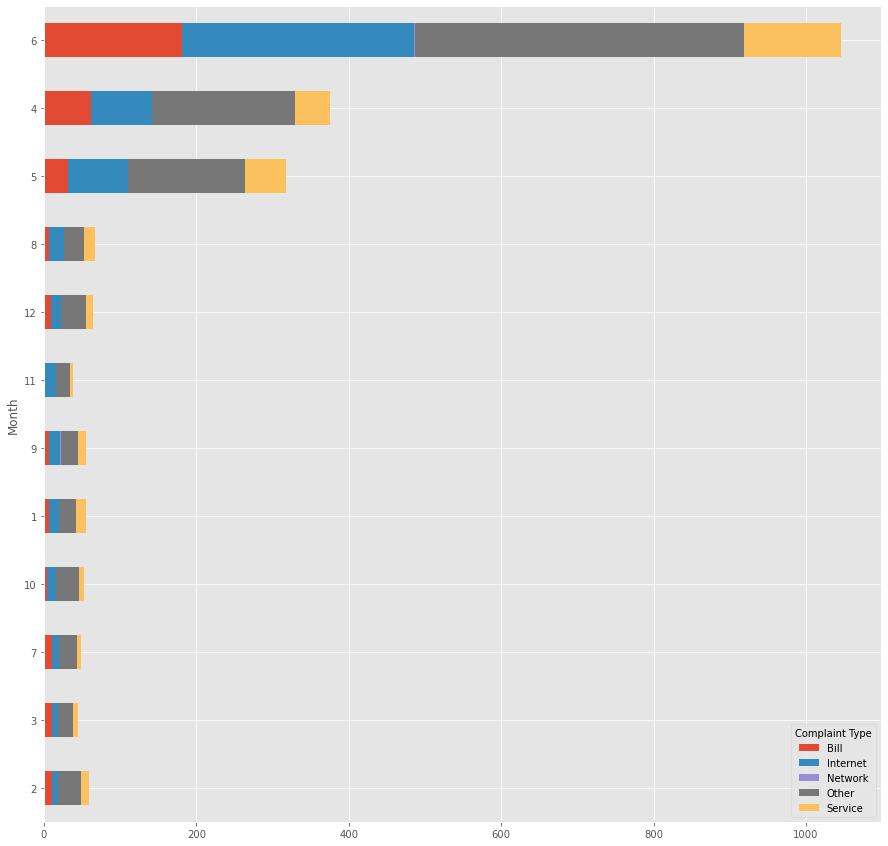

In [98]:
#just for fun, let's see what complaint types were made in June to check a theory
df.groupby(["Month","Complaint Type"]).size().unstack().fillna(0)

complaint_df = df.groupby(["Month","Complaint Type"]).size().unstack().fillna(0)
complaint_df.sort_values("Internet",ascending=True).plot(kind="barh", figsize=(15,15), stacked=True)

In [159]:
#create a new status column replacing pending with open and resolved with closed
df["Status"] = df["Status"].replace("Pending","Open")
df["Status"] = df["Status Type"].replace("Solved","Closed")

#df.head(20)
#clean state data
df["State"] = df["State"].replace("District Of Columbia","District of Columbia")

state_ttls = df.groupby(["State","Status Type"]).size().unstack().fillna(0)
state_ttls

Status Type,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District of Columbia,15.0,2.0
Florida,201.0,39.0


<AxesSubplot:ylabel='State'>

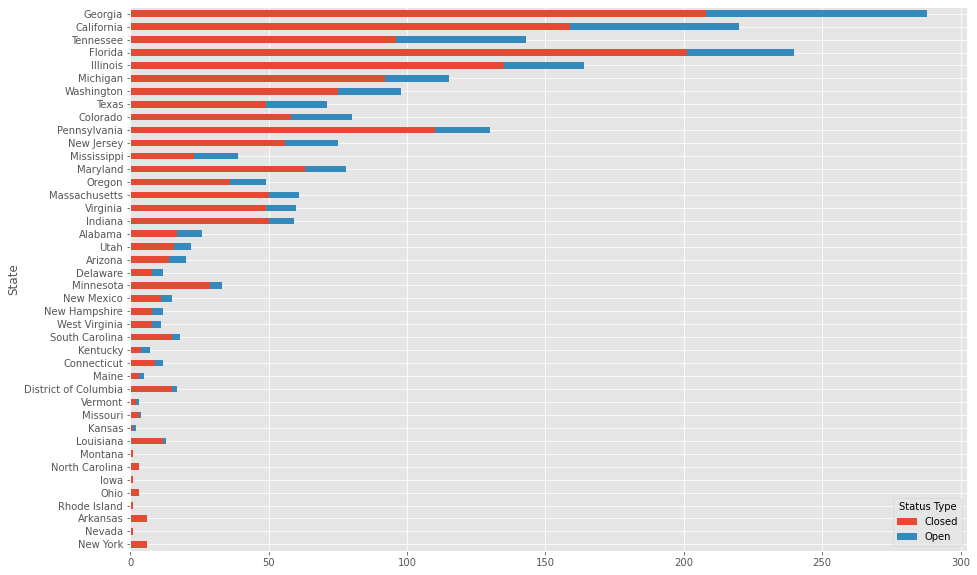

In [161]:
#create a stacked bar chart of complaint status type by state

state_ttls.sort_values("Open",ascending=True).plot(kind="barh", figsize=(15,10), stacked=True)

In [163]:
#find state with highest number of complaints
state_ttls["Total"] = state_ttls["Closed"] + state_ttls["Open"]
state_ttls.sort_values("Total", axis = 0, ascending = False)[:1]


Status Type,Closed,Open,Total
State,,,
Georgia,208.0,80.0,288.0


In [164]:
#find state with highest percentage of unresolved complaints
state_ttls["Unresolved"] = state_ttls["Open"]/ state_ttls["Open"].sum()*100
state_ttls.sort_values("Unresolved", axis = 0, ascending = False)[:1]


Status Type,Closed,Open,Total,Unresolved
State,,,,
Georgia,208.0,80.0,288.0,15.473888


In [165]:
#find state with highest percentage of resolved complaints completed through internet and calls
total_resolved = df.groupby(["Received Via","Status"]).size().unstack().fillna(0)
total_resolved["Closed"]/total_resolved["Closed"].sum()*100


Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: Closed, dtype: float64